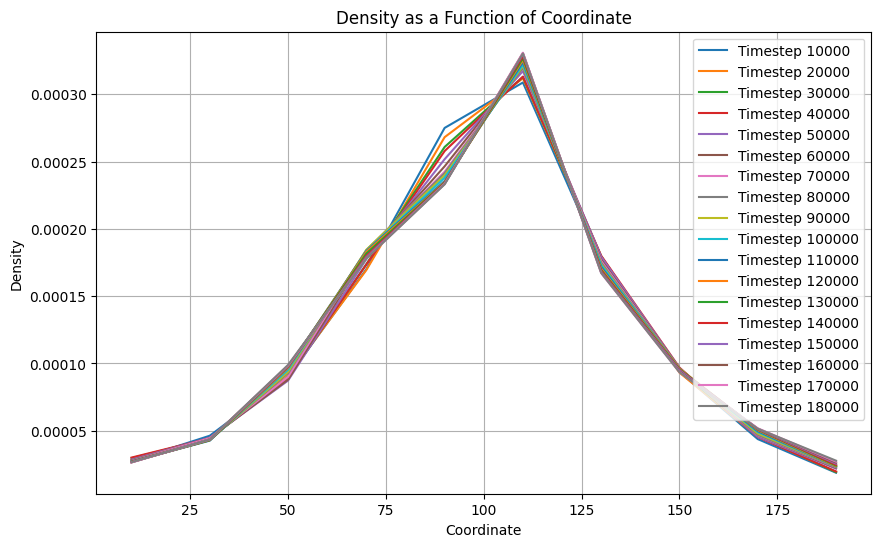

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
file_path = 'density1d.profile'

# Read the file
with open(file_path, 'r') as file:
    lines = file.readlines()

# Initialize lists to store the data
data = []
current_timestep = None
for line in lines:
    if line.startswith('#') or line.strip() == '':
        continue
    parts = line.split()
    if len(parts) == 3:
        current_timestep = int(parts[0])
    elif len(parts) == 4:
        coord = int(parts[1])
        density = float(parts[3])
        data.append([current_timestep, coord, density])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Timestep', 'Coord', 'Density'])

# Plot the data
timesteps = df['Timestep'].unique()
plt.figure(figsize=(10, 6))

for timestep in timesteps:
    timestep_data = df[df['Timestep'] == timestep]
    plt.plot(timestep_data['Coord'], timestep_data['Density'], label=f'Timestep {timestep}')

plt.xlabel('Coordinate')
plt.ylabel('Density')
plt.title('Density as a Function of Coordinate')
plt.legend()
plt.grid(True)
plt.show()


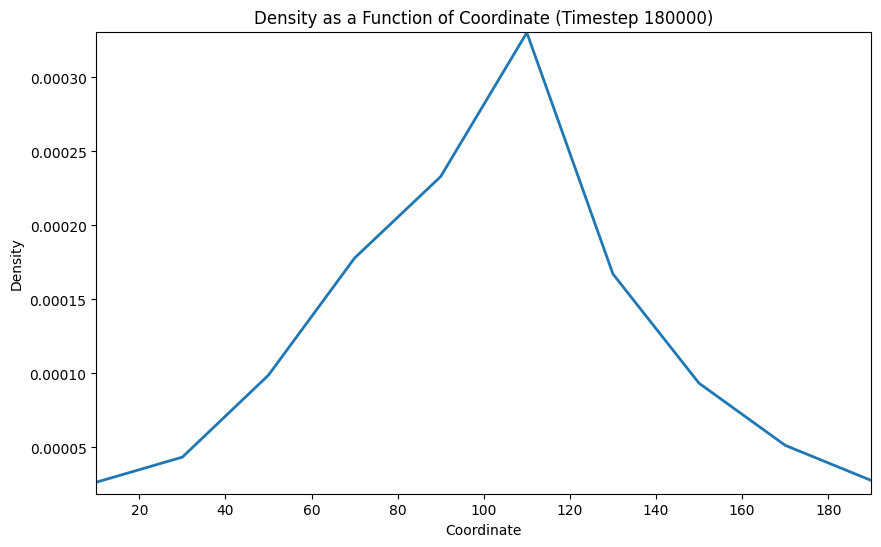

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the file path
file_path = 'density1d.profile'

# Read the file
with open(file_path, 'r') as file:
    lines = file.readlines()

# Initialize lists to store the data
data = []
current_timestep = None
for line in lines:
    if line.startswith('#') or line.strip() == '':
        continue
    parts = line.split()
    if len(parts) == 3:
        current_timestep = int(parts[0])
    elif len(parts) == 4:
        coord = int(parts[1])
        density = float(parts[3])
        data.append([current_timestep, coord, density])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Timestep', 'Coord', 'Density'])

# Setup the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot([], [], lw=2)
ax.set_xlim(df['Coord'].min(), df['Coord'].max())
ax.set_ylim(df['Density'].min(), df['Density'].max())
ax.set_xlabel('Coordinate')
ax.set_ylabel('Density')
ax.set_title('Density as a Function of Coordinate Over Time')

# Initialization function
def init():
    line.set_data([], [])
    return line,

# Animation function
def animate(timestep):
    timestep_data = df[df['Timestep'] == timestep]
    line.set_data(timestep_data['Coord'], timestep_data['Density'])
    ax.set_title(f'Density as a Function of Coordinate (Timestep {timestep})')
    return line,

# Create the animation
timesteps = sorted(df['Timestep'].unique())
ani = FuncAnimation(fig, animate, frames=timesteps, init_func=init, blit=True)

# Save or show the animation
# To save the animation as a video file:
ani.save('density_animation.mp4', fps=5, extra_args=['-vcodec', 'libx264'])

# To display the animation
plt.show()


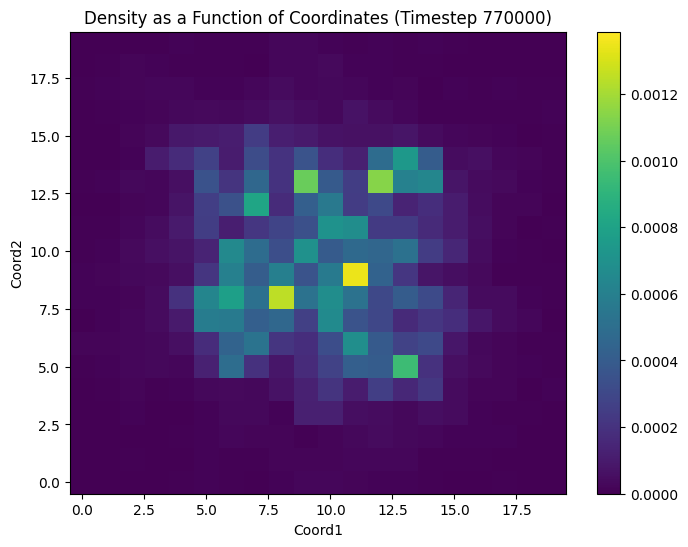

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the file path
file_path = 'density2d.profile'

# Read the file
with open(file_path, 'r') as file:
    lines = file.readlines()

# Initialize lists to store the data
data = []
current_timestep = None
for line in lines:
    if line.startswith('#') or line.strip() == '':
        continue
    parts = line.split()
    if len(parts) == 3:
        current_timestep = int(parts[0])
    elif len(parts) == 5:  # Assuming 5 columns for timestep, chunk, coord1, coord2, and density
        coord1 = float(parts[1])
        coord2 = float(parts[2])
        density = float(parts[4])
        data.append([current_timestep, coord1, coord2, density])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Timestep', 'Coord1', 'Coord2', 'Density'])

# Determine the unique coordinates
unique_coords1 = np.sort(df['Coord1'].unique())
unique_coords2 = np.sort(df['Coord2'].unique())

# Determine the global min and max density values for colormap scaling
vmin = df['Density'].min()
vmax = df['Density'].max()

# Create a grid for the coordinates
grid_coords1, grid_coords2 = np.meshgrid(unique_coords1, unique_coords2)

# Setup the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(np.zeros((len(unique_coords2), len(unique_coords1))), 
                cmap='viridis', origin='lower', aspect='auto', vmin=vmin, vmax=vmax)
fig.colorbar(cax, ax=ax)
ax.set_xlabel('Coord1')
ax.set_ylabel('Coord2')
ax.set_title('Density as a Function of Coordinates Over Time')

# Animation function
def animate(timestep):
    timestep_data = df[df['Timestep'] == timestep]
    density_grid = np.zeros((len(unique_coords2), len(unique_coords1)))
    
    for _, row in timestep_data.iterrows():
        coord1_idx = np.where(unique_coords1 == row['Coord1'])[0][0]
        coord2_idx = np.where(unique_coords2 == row['Coord2'])[0][0]
        density_grid[coord2_idx, coord1_idx] = row['Density']
    
    cax.set_array(density_grid)
    ax.set_title(f'Density as a Function of Coordinates (Timestep {timestep})')
    cax.set_clim(vmin, vmax)  # Set the color limits
    return cax,

# Create the animation
timesteps = sorted(df['Timestep'].unique())
ani = FuncAnimation(fig, animate, frames=timesteps, blit=True)

# Save or show the animation
# To save the animation as a video file:
ani.save('density2d_animation.mp4', fps=10, extra_args=['-vcodec', 'libx264'])

# To display the animation
plt.show()



<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <semantics>
    <mrow>
      <mi>&#x3C3;</mi>
      <mo>=</mo>
      <msqrt>
        <mrow>
          <mfrac>
            <mn>1</mn>
            <mi>N</mi>
          </mfrac>
          <munderover>
            <mo>&#x2211;</mo>
            <mrow>
              <mi>i</mi>
              <mo>=</mo>
              <mn>1</mn>
            </mrow>
            <mi>N</mi>
          </munderover>
          <msup>
            <mfenced separators="" open="(" close=")">
              <msub>
                <mi>&#x3C1;</mi>
                <mi>i</mi>
              </msub>
              <mo>&#x2212;</mo>
              <mi>&#x3BC;</mi>
            </mfenced>
            <mn>2</mn>
          </msup>
        </mrow>
      </msqrt>
      <mo>,</mo>
    </mrow>
  </semantics>
</math>

Hetereogeneity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the file path
file_path = 'density2d.profile'

# Read the file
with open(file_path, 'r') as file:
    lines = file.readlines()

# Initialize lists to store the data
data = []
current_timestep = None
for line in lines:
    if line.startswith('#') or line.strip() == '':
        continue
    parts = line.split()
    if len(parts) == 3:
        current_timestep = int(parts[0])
    elif len(parts) == 5:  # Assuming 5 columns for timestep, chunk, coord1, coord2, and density
        coord1 = float(parts[1])
        coord2 = float(parts[2])
        density = float(parts[4])
        data.append([current_timestep, coord1, coord2, density])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Timestep', 'Coord1', 'Coord2', 'Density'])

# Determine the unique coordinates
unique_coords1 = np.sort(df['Coord1'].unique())
unique_coords2 = np.sort(df['Coord2'].unique())

# Determine the global min and max density values for colormap scaling
vmin = df['Density'].min()
vmax = df['Density'].max()

# Create a grid for the coordinates
grid_coords1, grid_coords2 = np.meshgrid(unique_coords1, unique_coords2)

# Setup the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(np.zeros((len(unique_coords2), len(unique_coords1))), 
                cmap='viridis', origin='lower', aspect='auto', vmin=vmin, vmax=vmax)
fig.colorbar(cax, ax=ax)
ax.set_xlabel('Coord1')
ax.set_ylabel('Coord2')
ax.set_title('Density as a Function of Coordinates Over Time')

# Animation function
def animate(timestep):
    timestep_data = df[df['Timestep'] == timestep]
    density_grid = np.zeros((len(unique_coords2), len(unique_coords1)))
    
    for _, row in timestep_data.iterrows():
        coord1_idx = np.where(unique_coords1 == row['Coord1'])[0][0]
        coord2_idx = np.where(unique_coords2 == row['Coord2'])[0][0]
        density_grid[coord2_idx, coord1_idx] = row['Density']
    
    cax.set_array(density_grid)
    ax.set_title(f'Density as a Function of Coordinates (Timestep {timestep})')
    cax.set_clim(vmin, vmax)  # Set the color limits
    return cax,

# Create the animation
timesteps = sorted(df['Timestep'].unique())
ani = FuncAnimation(fig, animate, frames=timesteps, blit=True)

# Save or show the animation
# To save the animation as a video file:
ani.save('density2d_animation.mp4', fps=10, extra_args=['-vcodec', 'libx264'])

# To display the animation
plt.show()

# Calculate heterogeneity for each timestep
heterogeneity = []
for timestep in timesteps:
    timestep_data = df[df['Timestep'] == timestep]['Density']
    mean_density = timestep_data.mean()
    std_density = timestep_data.std()
    heterogeneity.append((timestep, std_density))

# Convert heterogeneity to a DataFrame
heterogeneity_df = pd.DataFrame(heterogeneity, columns=['Timestep', 'Heterogeneity'])

# Plot heterogeneity over time
plt.figure(figsize=(8, 6))
plt.plot(heterogeneity_df['Timestep'], heterogeneity_df['Heterogeneity'], marker='o')
plt.xlabel('Timestep')
plt.ylabel('Heterogeneity (σ)')
plt.title('Heterogeneity of the System Over Time')
plt.grid(True)
plt.show()


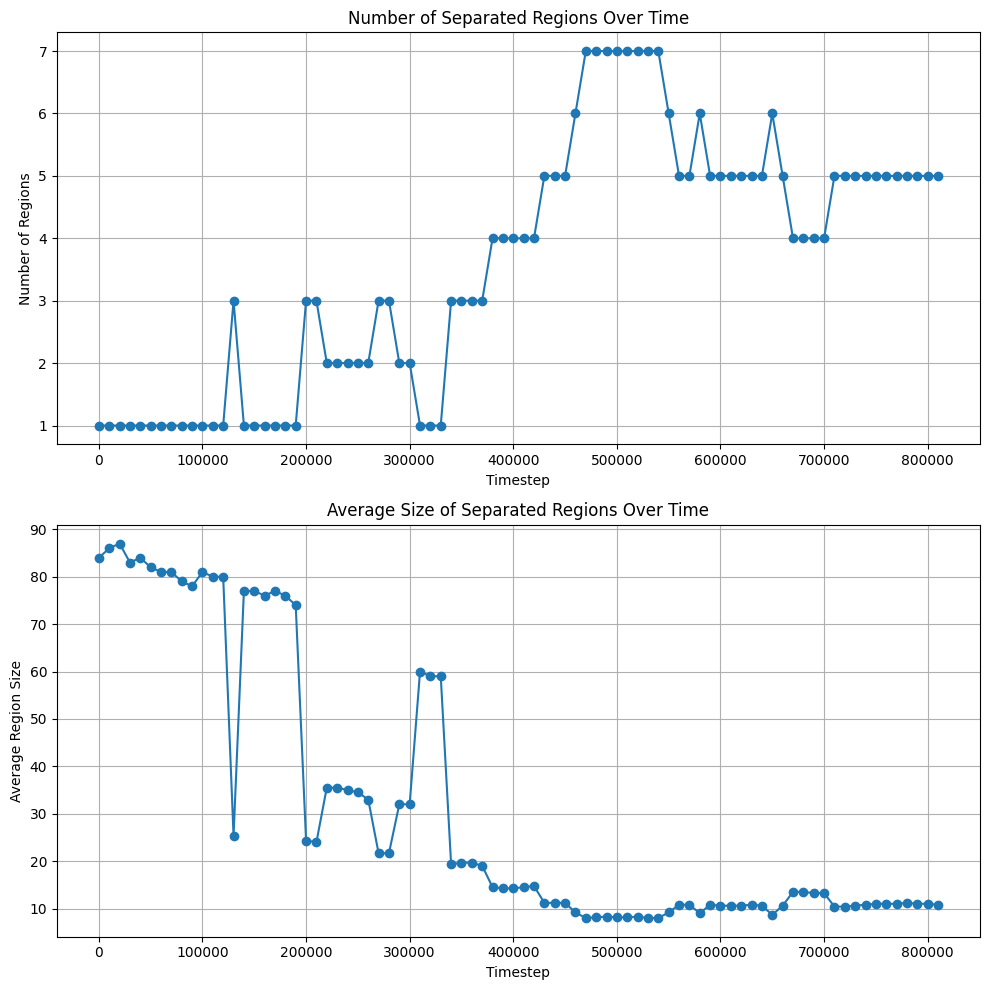

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label, find_objects

# Assuming 'df' is the DataFrame with the density data
# We'll use the same DataFrame 'df' created in the previous code

# Determine a threshold for phase separation (this might require tuning)
threshold = df['Density'].mean() + df['Density'].std()

# Function to compute phase separation metrics
def compute_phase_separation(df, threshold):
    phase_info = []
    for timestep in sorted(df['Timestep'].unique()):
        timestep_data = df[df['Timestep'] == timestep]
        density_grid = np.zeros((len(unique_coords2), len(unique_coords1)))
        
        for _, row in timestep_data.iterrows():
            coord1_idx = np.where(unique_coords1 == row['Coord1'])[0][0]
            coord2_idx = np.where(unique_coords2 == row['Coord2'])[0][0]
            density_grid[coord2_idx, coord1_idx] = row['Density']
        
        # Identify high-density regions (one phase)
        high_density_regions = density_grid > threshold
        
        # Label connected regions
        labeled_array, num_features = label(high_density_regions)
        
        # Compute sizes of each region
        region_sizes = [np.sum(labeled_array == i) for i in range(1, num_features + 1)]
        
        # Append information for this timestep
        phase_info.append((timestep, num_features, np.mean(region_sizes)))
    
    return pd.DataFrame(phase_info, columns=['Timestep', 'NumRegions', 'AvgRegionSize'])

# Compute phase separation metrics
phase_separation_df = compute_phase_separation(df, threshold)

# Plot phase separation metrics over time
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
ax1.plot(phase_separation_df['Timestep'], phase_separation_df['NumRegions'], marker='o')
ax1.set_xlabel('Timestep')
ax1.set_ylabel('Number of Regions')
ax1.set_title('Number of Separated Regions Over Time')
ax1.grid(True)

ax2.plot(phase_separation_df['Timestep'], phase_separation_df['AvgRegionSize'], marker='o')
ax2.set_xlabel('Timestep')
ax2.set_ylabel('Average Region Size')
ax2.set_title('Average Size of Separated Regions Over Time')
ax2.grid(True)

plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label
from mpl_toolkits.mplot3d import Axes3D

# Define the file path
file_path = 'density3d.profile'

# Read the file
with open(file_path, 'r') as file:
    lines = file.readlines()

# Initialize lists to store the data
data = []
current_timestep = None
for line in lines:
    if line.startswith('#') or line.strip() == '':
        continue
    parts = line.split()
    if len(parts) == 3:
        current_timestep = int(parts[0])
    elif len(parts) == 6:  # Assuming 6 columns for timestep, chunk, coord1, coord2, coord3, and density
        coord1 = float(parts[1])
        coord2 = float(parts[2])
        coord3 = float(parts[3])
        density = float(parts[5])
        data.append([current_timestep, coord1, coord2, coord3, density])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Timestep', 'Coord1', 'Coord2', 'Coord3', 'Density'])

# Determine the unique coordinates
unique_coords1 = np.sort(df['Coord1'].unique())
unique_coords2 = np.sort(df['Coord2'].unique())
unique_coords3 = np.sort(df['Coord3'].unique())

# Determine the global min and max density values for colormap scaling
vmin = df['Density'].min()
vmax = df['Density'].max()

# Function to compute phase separation metrics
def compute_phase_separation(df, threshold):
    phase_info = []
    for timestep in sorted(df['Timestep'].unique()):
        timestep_data = df[df['Timestep'] == timestep]
        density_grid = np.zeros((len(unique_coords3), len(unique_coords2), len(unique_coords1)))
        
        for _, row in timestep_data.iterrows():
            coord1_idx = np.where(unique_coords1 == row['Coord1'])[0][0]
            coord2_idx = np.where(unique_coords2 == row['Coord2'])[0][0]
            coord3_idx = np.where(unique_coords3 == row['Coord3'])[0][0]
            density_grid[coord3_idx, coord2_idx, coord1_idx] = row['Density']
        
        # Identify high-density regions (one phase)
        high_density_regions = density_grid > threshold
        
        # Label connected regions
        labeled_array, num_features = label(high_density_regions)
        
        # Compute sizes of each region
        region_sizes = [np.sum(labeled_array == i) for i in range(1, num_features + 1)]
        
        # Append information for this timestep
        phase_info.append((timestep, num_features, np.mean(region_sizes) if region_sizes else 0))
    
    return pd.DataFrame(phase_info, columns=['Timestep', 'NumRegions', 'AvgRegionSize'])

# Determine a threshold for phase separation (this might require tuning)
threshold = df['Density'].mean() + df['Density'].std()

# Compute phase separation metrics
phase_separation_df = compute_phase_separation(df, threshold)

# Plot phase separation metrics over time
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
ax1.plot(phase_separation_df['Timestep'], phase_separation_df['NumRegions'], marker='o')
ax1.set_xlabel('Timestep')
ax1.set_ylabel('Number of Regions')
ax1.set_title('Number of Separated Regions Over Time')
ax1.grid(True)

ax2.plot(phase_separation_df['Timestep'], phase_separation_df['AvgRegionSize'], marker='o')
ax2.set_xlabel('Timestep')
ax2.set_ylabel('Average Region Size')
ax2.set_title('Average Size of Separated Regions Over Time')
ax2.grid(True)

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label
from mpl_toolkits.mplot3d import Axes3D
from scipy.fft import fftn, fftshift

# Define the file path
file_path = 'density3d.profile'

# Read the file
with open(file_path, 'r') as file:
    lines = file.readlines()

# Initialize lists to store the data
data = []
current_timestep = None
for line in lines:
    if line.startswith('#') or line.strip() == '':
        continue
    parts = line.split()
    if len(parts) == 3:
        current_timestep = int(parts[0])
    elif len(parts) == 6:  # Assuming 6 columns for timestep, chunk, coord1, coord2, coord3, and density
        coord1 = float(parts[1])
        coord2 = float(parts[2])
        coord3 = float(parts[3])
        density = float(parts[5])
        data.append([current_timestep, coord1, coord2, coord3, density])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Timestep', 'Coord1', 'Coord2', 'Coord3', 'Density'])

# Determine the unique coordinates
unique_coords1 = np.sort(df['Coord1'].unique())
unique_coords2 = np.sort(df['Coord2'].unique())
unique_coords3 = np.sort(df['Coord3'].unique())

# Function to compute Fourier transform of the density data
def compute_fourier_transform(df):
    fourier_info = []
    for timestep in sorted(df['Timestep'].unique()):
        timestep_data = df[df['Timestep'] == timestep]
        density_grid = np.zeros((len(unique_coords3), len(unique_coords2), len(unique_coords1)))
        
        for _, row in timestep_data.iterrows():
            coord1_idx = np.where(unique_coords1 == row['Coord1'])[0][0]
            coord2_idx = np.where(unique_coords2 == row['Coord2'])[0][0]
            coord3_idx = np.where(unique_coords3 == row['Coord3'])[0][0]
            density_grid[coord3_idx, coord2_idx, coord1_idx] = row['Density']
        
        # Perform 3D Fourier Transform
        fft_density = fftn(density_grid)
        fft_density_shifted = fftshift(fft_density)
        magnitude_spectrum = np.abs(fft_density_shifted)
        
        # Append information for this timestep
        fourier_info.append((timestep, magnitude_spectrum))
    
    return fourier_info

# Compute Fourier transform of the density data
fourier_info = compute_fourier_transform(df)




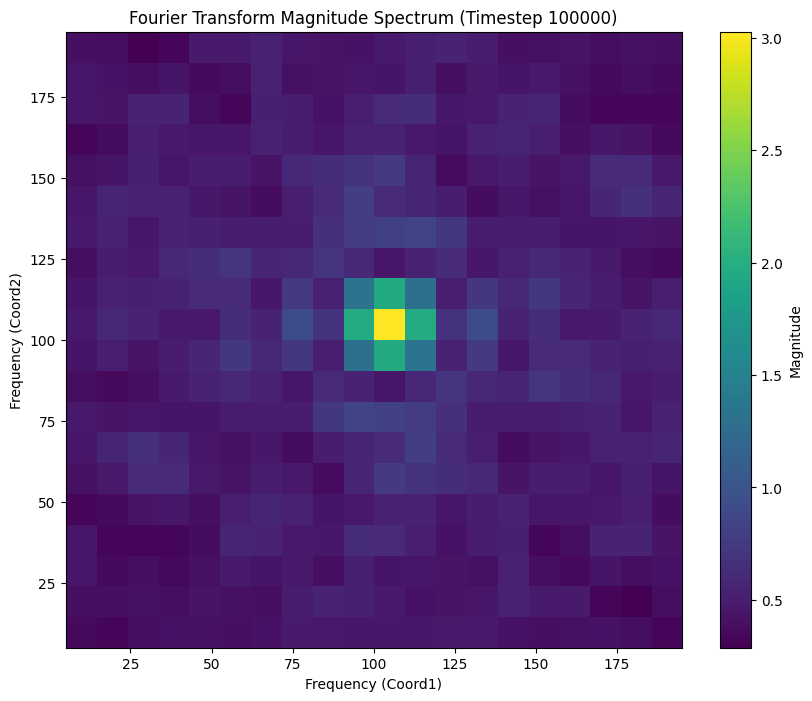

In [10]:
# Plot Fourier transform results for a specific timestep
timestep_to_plot = 1e5
for timestep, magnitude_spectrum in fourier_info:
    if timestep == timestep_to_plot:
        # Sum over one axis to reduce dimensionality for visualization
        magnitude_projection = np.sum(magnitude_spectrum, axis=0)
        
        plt.figure(figsize=(10, 8))
        plt.imshow(magnitude_projection, extent=(unique_coords1[0], unique_coords1[-1], unique_coords2[0], unique_coords2[-1]), origin='lower', cmap='viridis')
        plt.colorbar(label='Magnitude')
        plt.xlabel('Frequency (Coord1)')
        plt.ylabel('Frequency (Coord2)')
        plt.title(f'Fourier Transform Magnitude Spectrum (Timestep {timestep})')
        plt.show()
        break